# Let's Practice: Lab2

In [1]:
#   __  __                   _                   _           
#  |  \/  |                 | |                 (_)          
#  | \  / | __ _  __ _  ___ | |_ _ __ ___  _ __  _  ___ ___  
#  | |\/| |/ _` |/ _` |/ _ \| __| '__/ _ \| '_ \| |/ __/ _ \ 
#  | |  | | (_| | (_| | (_) | |_| | | (_) | | | | | (_| (_) |
#  |_|  |_|\__,_|\__, |\___/ \__|_|  \___/|_| |_|_|\___\___/ 
#                 __/ |                                      
#                |___/                                       
# ─────────────────────────────────────────────────────────────────────────────
#                                                                           
# Script Name : Lab2.py
# Author      : Dilan Castañeda                                             
# Created On  : September 18, 2024                                           
# Last Update : September 18, 2024                                         
# Version     : 1.0.0                                          
# Description : La prueba de hemoglobina A1c, que es una prueba de sangre aplicada a los diabéticos durante sus chequeos periódicos, indica el nivel de control de azúcar en la sangre durante los dos o tres meses pasados. Los datos siguientes se obtuvieron de 40 diabéticos distintos en una clínica universitaria que atiende a pacientes diabéticos.      
# ─────────────────────────────────────────────────────────────────────────────

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Extract

In [3]:
# Paso 0: Crear un DataFrame con los datos
columns = ['hemoglobin']
data = [6.5, 6.4, 5, 7.9, 5, 6, 8, 6, 5.6, 5.6, 6.5, 5.6, 7.6, 6, 6.1, 6, 4.8, 5.7, 6.4, 6.2, 8, 9.2, 6.6, 7.7, 7.5, 8.1, 7.2, 6.7, 7.9, 8, 5.9, 7.7, 8, 6.5, 4, 8.2, 9.2, 6.6, 5.7, 9]
df = pd.DataFrame(data, columns=columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hemoglobin  40 non-null     float64
dtypes: float64(1)
memory usage: 452.0 bytes


## Trasnform

In [4]:
# Paso 1. Determine la cantidad de datos (n)
n = len(df)
print('Amount of data (n):', n)

# Paso 2. Ordene los datos de menor a mayor
df_ordered = df.sort_values(by='hemoglobin', ignore_index=True)
df_ordered.head()

Amount of data (n): 40


,hemoglobin
0,4.0
1,4.8
2,5.0
3,5.0
4,5.6


In [5]:
# Paso 3. Identifique el Valor Mayor (VM) y el Valor menor (Vm)
max_value = df_ordered['hemoglobin'].max()
min_value = df_ordered['hemoglobin'].min()
print('Max Value:', max_value)
print('Min Value:', min_value)

# Paso 4. Obtenga el Rango (R)
range_value = max_value - min_value
print('Range (R):', round(range_value,2))

# Paso 4.1. Obtenga el número aproximado de intervalos (k)
k = 1 + 3.322 * np.log10(n)
k = round(k)
print('Aprox. amoun of Intervals (k):', k)

# Paso 5. Obtenga la longitud de cada intervalo (W)
w = range_value / k
w = round(w,2)
print('Length of each interval (w):', w)

Max Value: 9.2
Min Value: 4.0
Range (R): 5.2
Aprox. amoun of Intervals (k): 6
Length of each interval (w): 0.87


In [6]:
# Paso 6. Construya los 5 intervalos con una longitud de 0.87
intervals = []
for i in range(k):
    if i == 0:
        intervals.append([min_value, min_value + w])
    else:
        intervals.append([intervals[i-1][1], intervals[i-1][1] + w])

# Paso 7. Identifique y cuente los datos que caen dentro de cada intervalo.
intervals_count = []
intervals_data = []
for interval in intervals:
    count = df[(df['hemoglobin'] >= interval[0]) & (df['hemoglobin'] < interval[1])].count()
    intervals_count.append(count.iloc[0])
    intervals_data.append(df[(df['hemoglobin'] >= interval[0]) & (df['hemoglobin'] < interval[1])]['hemoglobin'].values)

# Display frequency table (interval, data, frequency)
frequency_table = pd.DataFrame({'Interval': intervals, 'Data': intervals_data, 'Frequency': intervals_count})
frequency_table

,Interval,Data,Frequency
0,"[4.0, 4.87]","[4.8, 4.0]",2
1,"[4.87, 5.74]","[5.0, 5.0, 5.6, 5.6, 5.6, 5.7, 5.7]",7
2,"[5.74, 6.61]","[6.5, 6.4, 6.0, 6.0, 6.5, 6.0, 6.1, 6.0, 6.4, ...",14
3,"[6.61, 7.48]","[7.2, 6.7]",2
4,"[7.48, 8.35]","[7.9, 8.0, 7.6, 8.0, 7.7, 7.5, 8.1, 7.9, 8.0, ...",12
5,"[8.35, 9.219999999999999]","[9.2, 9.2, 9.0]",3


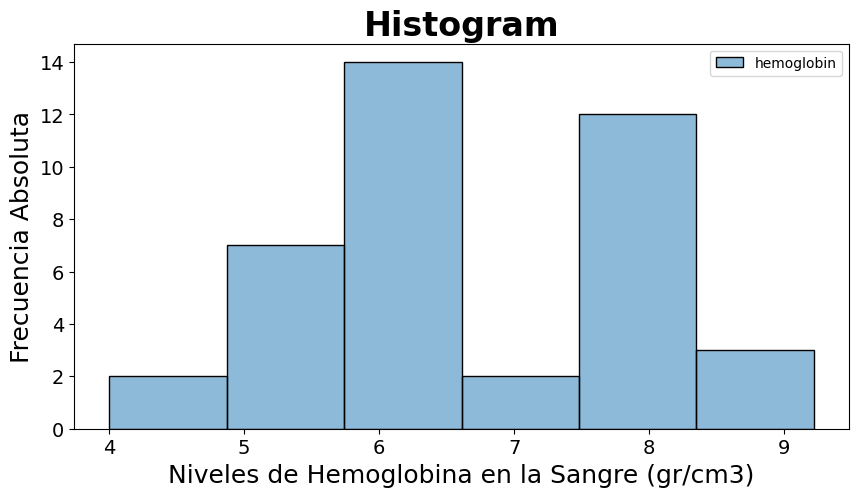

In [7]:
plt.figure(figsize=(10,5))
bins = []
for idx, interval in enumerate(intervals):
    if idx == 0:
        bins.append(interval[0])
        bins.append(interval[1])
    else:
        bins.append(interval[1])
            
sns.histplot(data = df_ordered, bins=bins, color='skyblue', edgecolor='black')
plt.title('Histogram', fontsize=24, fontweight='bold')
plt.xlabel('Niveles de Hemoglobina en la Sangre (gr/cm3)', fontsize=18)
plt.ylabel('Frecuencia Absoluta', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()


In [8]:
# Obtencion de frecuencia relativa y frecuencia porcentual
frequency_table['Relative Frequency'] = frequency_table['Frequency'] / n
frequency_table['Percentage Frequency'] = frequency_table['Relative Frequency'] * 100
frequency_table


,Interval,Data,Frequency,Relative Frequency,Percentage Frequency
0,"[4.0, 4.87]","[4.8, 4.0]",2,0.050,5.0
1,"[4.87, 5.74]","[5.0, 5.0, 5.6, 5.6, 5.6, 5.7, 5.7]",7,0.175,17.5
2,"[5.74, 6.61]","[6.5, 6.4, 6.0, 6.0, 6.5, 6.0, 6.1, 6.0, 6.4, ...",14,0.350,35.0
3,"[6.61, 7.48]","[7.2, 6.7]",2,0.050,5.0
4,"[7.48, 8.35]","[7.9, 8.0, 7.6, 8.0, 7.7, 7.5, 8.1, 7.9, 8.0, ...",12,0.300,30.0
5,"[8.35, 9.219999999999999]","[9.2, 9.2, 9.0]",3,0.075,7.5


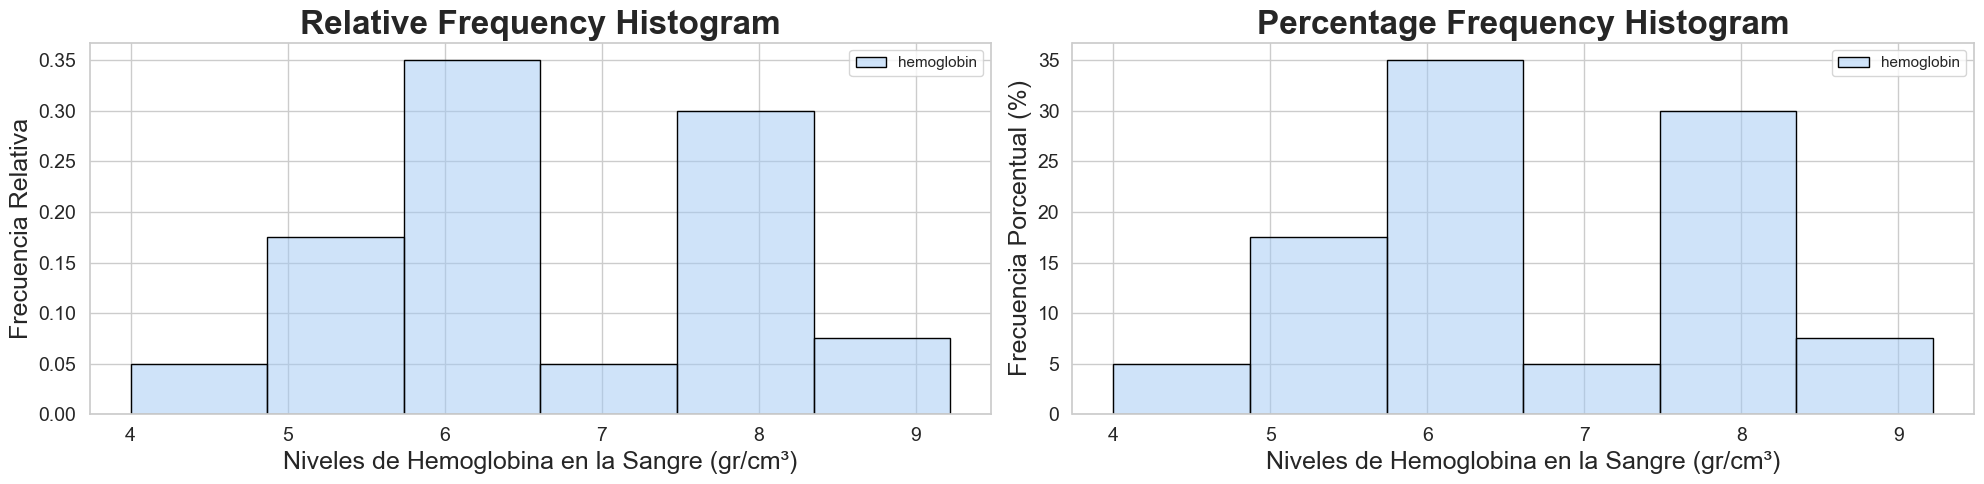

In [9]:
# Set the style of seaborn
sns.set(style="whitegrid", palette="pastel")

# Define the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot Relative Frequency Histogram
sns.histplot(data=df_ordered, bins=bins, stat='probability', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Relative Frequency Histogram', fontsize=24, fontweight='bold')
axes[0].set_xlabel('Niveles de Hemoglobina en la Sangre (gr/cm³)', fontsize=18)
axes[0].set_ylabel('Frecuencia Relativa', fontsize=18)
axes[0].tick_params(axis='both', which='major', labelsize=14)

# Plot the Percentage Frequency Histogram
sns.histplot(data=df_ordered, bins=bins, stat='percent', ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Percentage Frequency Histogram', fontsize=24, fontweight='bold')
axes[1].set_xlabel('Niveles de Hemoglobina en la Sangre (gr/cm³)', fontsize=18)
axes[1].set_ylabel('Frecuencia Porcentual (%)', fontsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=14)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [10]:
# Compute the mids of each class, the m value
frequency_table['m'] = (frequency_table['Interval'].apply(lambda x: x[0]) + frequency_table['Interval'].apply(lambda x: x[1])) / 2
m_class_ticks = list(frequency_table['m'].values)

# Add the previous and next values to the m_class_ticks
m_class_ticks.insert(0, min_value - w/2)
m_class_ticks.append(max_value + w/2)

m_class_ticks


[np.float64(3.565),
 np.float64(4.4350000000000005),
 np.float64(5.305),
 np.float64(6.175000000000001),
 np.float64(7.045),
 np.float64(7.915),
 np.float64(8.785),
 np.float64(9.635)]

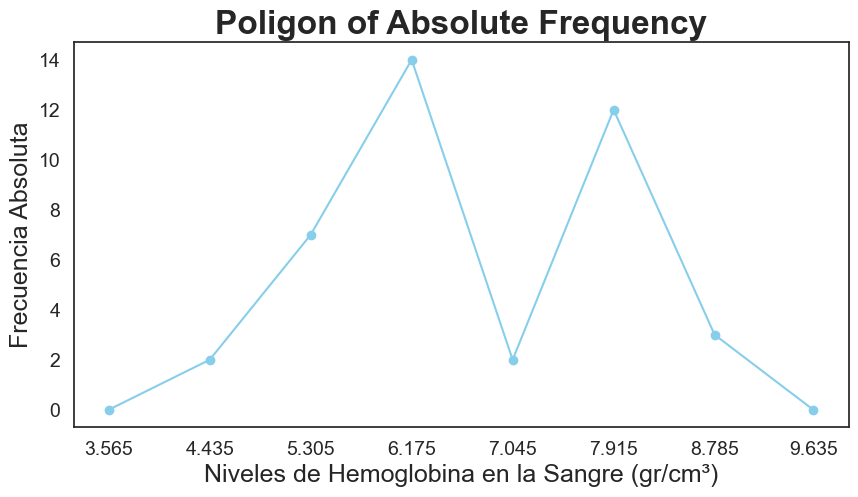

In [11]:
# Display poligon of absolute frequency
sns.set(style="white", palette="pastel")
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(m_class_ticks, [0] + list(frequency_table['Frequency'].values) + [0], marker='o', color='skyblue')
ax.set_xticks(m_class_ticks)
plt.title('Poligon of Absolute Frequency', fontsize=24, fontweight='bold')
plt.xlabel('Niveles de Hemoglobina en la Sangre (gr/cm³)', fontsize=18)
plt.ylabel('Frecuencia Absoluta', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()


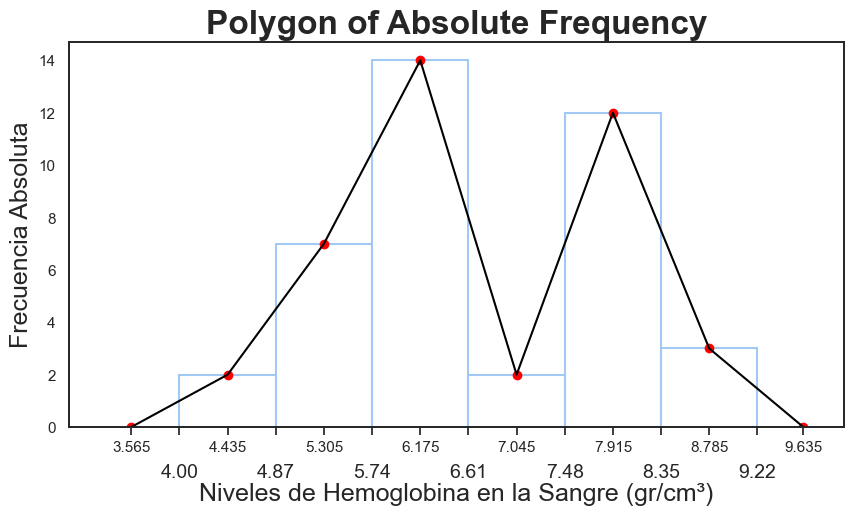

In [12]:
# Create a figure and axis for the plot, with specific figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Set x-axis limits for better visualization of the data
ax.set_xlim(3, 10)

# Plot the histogram with specified data, bins, and visual attributes (color, edge color)
sns.histplot(data=df_ordered, bins=bins, edgecolor='green', legend=False, fill=False)

# Plot the polygon of absolute frequency
# m_class_ticks are midpoints for the class intervals
# Adding [0] at the start and end of the frequency values ensures the polygon starts and ends at y=0
ax.plot(m_class_ticks, [0] + list(frequency_table['Frequency'].values) + [0], color='black')

# Set ticks for the primary x-axis (class midpoints)
ax.set_xticks(m_class_ticks)

# Create a secondary x-axis that shares the same y-axis
ax2 = ax.twiny()

# Set the same x-axis limits for the secondary axis
ax2.set_xlim(3, 10)

# Set the tick marks for the secondary x-axis (bin edges)
ax2.set_xticks(bins)

# Set the tick positions for the secondary axis at the bottom
ax2.xaxis.set_ticks_position('bottom')

# Add padding to the tick labels of the secondary x-axis for better visibility
ax2.xaxis.set_tick_params(pad=20)

# Scatter plot points to highlight the frequencies at each class midpoint
ax.scatter(m_class_ticks, [0] + list(frequency_table['Frequency'].values) + [0], color='red')

# Add a title with specific formatting (font size and weight)
plt.title('Polygon of Absolute Frequency', fontsize=24, fontweight='bold')

# Label the x-axis and y-axis with appropriate text and font size, adding padding for the x-axis label
ax.set_xlabel('Niveles de Hemoglobina en la Sangre (gr/cm³)', fontsize=18, labelpad=20) 
ax.set_ylabel('Frecuencia Absoluta', fontsize=18)

# Set the tick parameters for both axes, with a specified label size for the ticks
plt.tick_params(axis='both', which='major', labelsize=14)

# Remove the legend, but still keep the structure for adding one later if needed
plt.legend([], [], frameon=False)

# Display the final plot
plt.show()


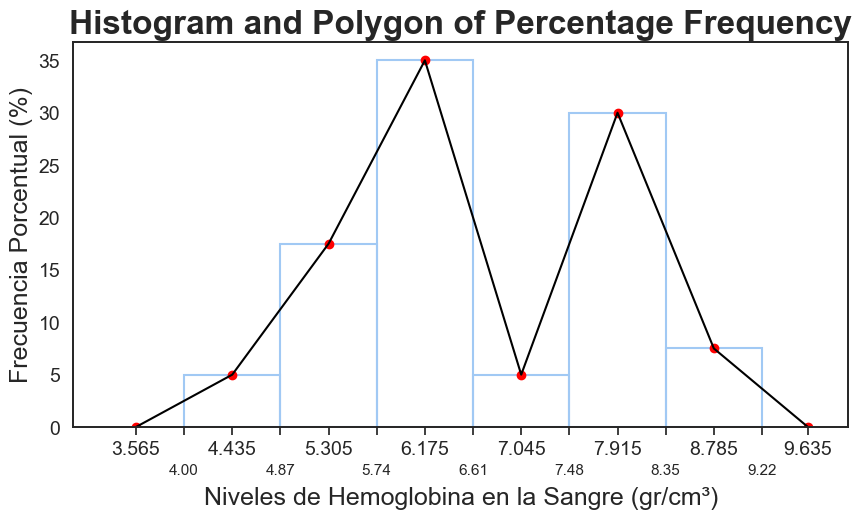

In [13]:
# Create a figure and axis for the plot, with specific figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Set x-axis limits for better visualization of the data
ax.set_xlim(3, 10)

# Plot the histogram with specified data, bins, and visual attributes (color, edge color)
sns.histplot(data=df_ordered, bins=bins, edgecolor='green', legend=False, fill=False, stat='percent', ax=ax)

# Plot the polygon of absolute frequency
ax.plot(m_class_ticks, [0] + list(frequency_table['Percentage Frequency'].values) + [0], color='black')

# Set ticks for the primary x-axis (class midpoints)
ax.set_xticks(m_class_ticks)

# Create a secondary x-axis that shares the same y-axis
ax2 = ax.twiny()

# Set the same x-axis limits for the secondary axis
ax2.set_xlim(3, 10)

# Set the tick marks for the secondary x-axis (bin edges)
ax2.set_xticks(bins)

# Set the tick positions for the secondary axis at the bottom
ax2.xaxis.set_ticks_position('bottom')

# Add padding to the tick labels of the secondary x-axis for better visibility
ax2.xaxis.set_tick_params(pad=20)

# Scatter plot points to highlight the frequencies at each class midpoint
ax.scatter(m_class_ticks, [0] + list(frequency_table['Percentage Frequency'].values) + [0], color='red')

# Add a title with specific formatting (font size and weight)
ax.set_title('Histogram and Polygon of Percentage Frequency', fontsize=24, fontweight='bold')

# Label the x-axis and y-axis with appropriate text and font size
ax.set_xlabel('Niveles de Hemoglobina en la Sangre (gr/cm³)', fontsize=18, labelpad=20)
ax.set_ylabel('Frecuencia Porcentual (%)', fontsize=18)

# Set the tick parameters for both axes, with a specified label size for the ticks
ax.tick_params(axis='both', which='major', labelsize=14)

# Display the final plot
plt.show()
